In [31]:
    import matplotlib.pyplot as plt
    import csv
    import numpy as np
    from matplotlib.backends.backend_pdf import PdfPages
    %matplotlib inline


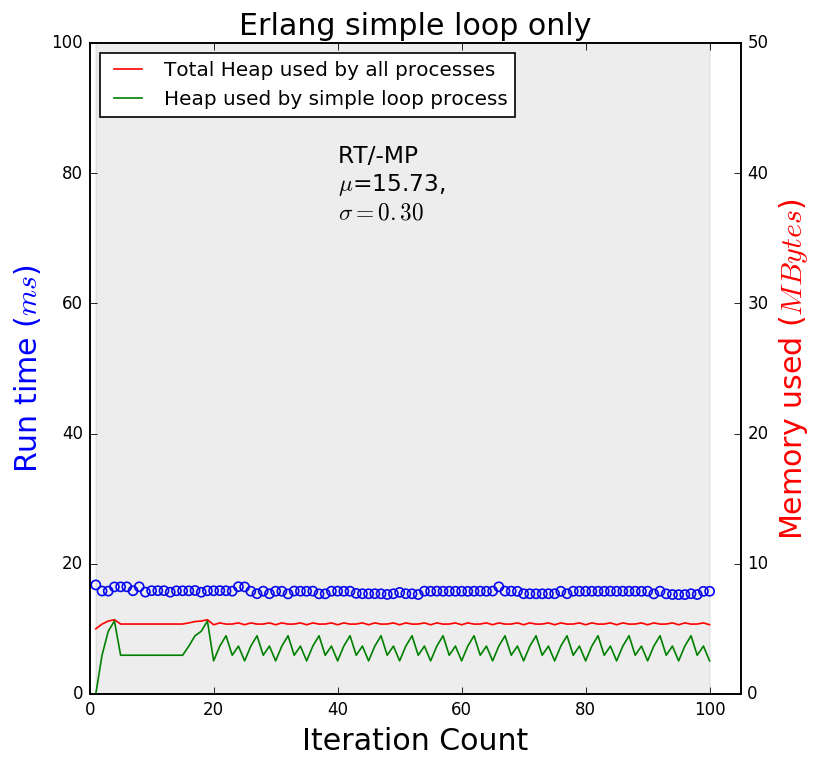

In [32]:
iteration, time , totalmemory,compmemory = np.loadtxt('comp.txt', delimiter=':', unpack=True)


iteration = [h for h in reversed(iteration)]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f*8/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

mean  = np.mean(time)
std = np.std(time)
L0 = "RT/-MP\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean, std)


ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iteration Count",fontsize=18)
ax1.set_ylim([0,100])

ax1.set_xlim([0,iteration[-1]+5])
ax1.text(40,73,L0,fontsize=14)
ax1.axvspan(iteration[0],iteration[-1],alpha=0.1, color="#555555")

ax2.set_ylabel("Memory used ($MBytes$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iterations",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b',label = 'Time to allocate large array')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used by all processes' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by simple loop process' ,color = 'green')


plt.title('Erlang simple loop only',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_componly"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()

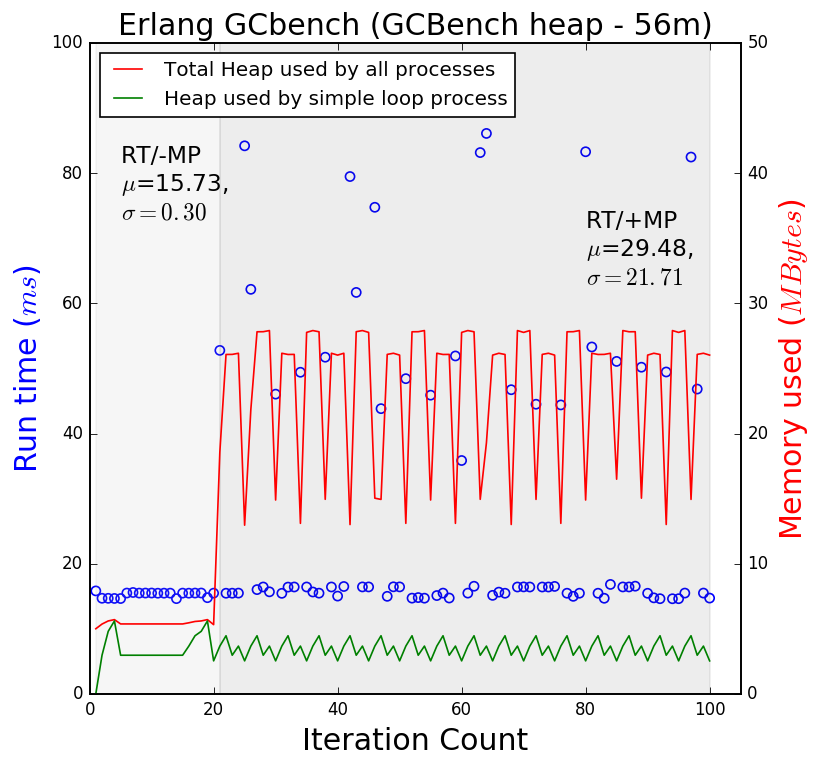

In [33]:
iteration, time , totalmemory,compmemory = np.loadtxt('gcb.txt', delimiter=':', unpack=True)


iteration = [h for h in reversed(iteration)]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f*8/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

mean0,mean1  = np.mean(time[0:19]),np.mean(time[20:100])
std0,std1 = np.std(time[0:19]),np.std(time[20:100])

L0 = "RT/-MP\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean, std)
L1 = "RT/+MP\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean1, std1)


ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iteration Count",fontsize=18)
ax1.set_ylim([0,100])

ax1.set_xlim([0,iteration[-1]+5])
ax1.text(5,73,L0,fontsize=14)
ax1.text(80,63,L1,fontsize=14)
ax1.axvspan(iteration[0],iteration[20],alpha=0.1, color="#AAAAAA")
ax1.axvspan(iteration[20],iteration[-1],alpha=0.1, color="#555555")

ax2.set_ylabel("Memory used ($MBytes$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iteration Count",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used by all processes' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by simple loop process' ,color = 'green')


plt.title('Erlang GCbench (GCBench heap - 56m)',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_gcb"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()

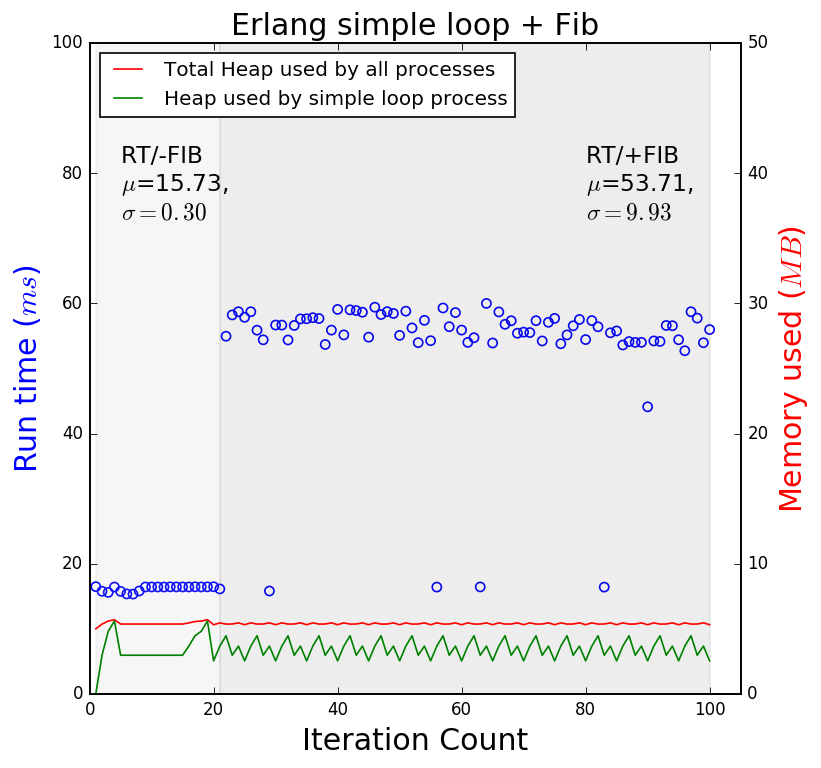

In [34]:
iteration, time , totalmemory,compmemory = np.loadtxt('complex.txt', delimiter=':', unpack=True)


iteration = [h for h in reversed(iteration)]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f*8/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()


mean0,mean1  = np.mean(time[0:19]),np.mean(time[20:100])
std0,std1 = np.std(time[0:19]),np.std(time[20:100])

L0 = "RT/-FIB\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean, std)
L1 = "RT/+FIB\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean1, std1)

ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iteration Count",fontsize=18)
ax1.set_ylim([0,100])

ax1.set_xlim([0,iteration[-1]+5])
ax1.text(5,73,L0,fontsize=14)
ax1.text(80,73,L1,fontsize=14)
ax1.axvspan(iteration[0],iteration[20],alpha=0.1, color="#AAAAAA")
ax1.axvspan(iteration[20],iteration[-1],alpha=0.1, color="#555555")

ax2.set_ylabel("Memory used ($MB$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iteration Count",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b',label = 'Time to allocate large array')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used by all processes' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by simple loop process' ,color = 'green')


plt.title('Erlang simple loop + Fib',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_complexcomp"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()

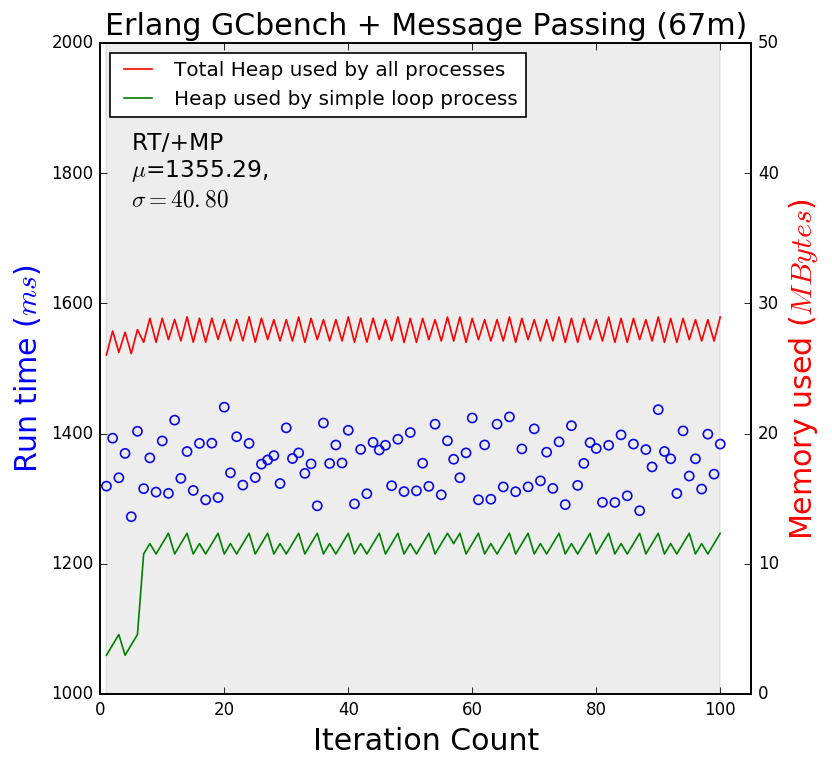

In [35]:
iteration, time , totalmemory,compmemory = np.loadtxt('gcbmp.txt', delimiter=':', unpack=True)


iteration = [h for h in reversed(iteration)]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f*8/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

mean = np.mean(time[0:100])
std = np.std(time[0:100])

L0 = "RT/+MP\n$\mu$={0:.2f},\n$\sigma={1:.2f}$".format(mean, std)


ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iteration Count",fontsize=18)
ax1.set_ylim([1000,2000])

ax1.set_xlim([0,iteration[-1]+5])
ax1.text(5,1750,L0,fontsize=14)
ax1.axvspan(iteration[0],iteration[-1],alpha=0.1, color="#555555")

ax2.set_ylabel("Memory used ($MBytes$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iteration Count",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used by all processes' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by simple loop process' ,color = 'green')


plt.title('Erlang GCbench + Message Passing (67m)',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_mp"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()